# HW_4 DECISION TRESS

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
california_housing = fetch_california_housing(as_frame=True)

### 1. Получите данные и загрузите их в рабочую среду.

In [73]:
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2а. Проверте данные на пропуски. Удалите в случае обнаружения

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [75]:
# Данные не содержат пропусков

#### 2b. Нормализуйте один из признаков

In [76]:
from sklearn import preprocessing
# нормализуем все признаке после разбияения на тестовую и тренировучную

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [77]:
y = california_housing.target
X = california_housing.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

### 4. Обучите модель регрессии на обучающем множетсве.

In [79]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.6125511913966952

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [80]:
model_test = LinearRegression().fit(X_test,y_test)
model_test.score(X_test,y_test)

0.596054650433006

### 6. Обучите дерево решений на обучающем множестве.

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

Дана задача регрессии надо преобразовать ее в задачу классификации

In [82]:
kb = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y_t = np.array(y).reshape(-1, 1)
kb.fit(y_t)
y_transformed = kb.transform(y_t)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

- Обучите модель и визуалитизируйте решение дерева

In [84]:
tree_clf.fit(X_train, y_train)
from sklearn.metrics import f1_score
p = tree_clf.predict(X_test)
print(f1_score(y_test, p, average='micro'))

0.7376453488372093


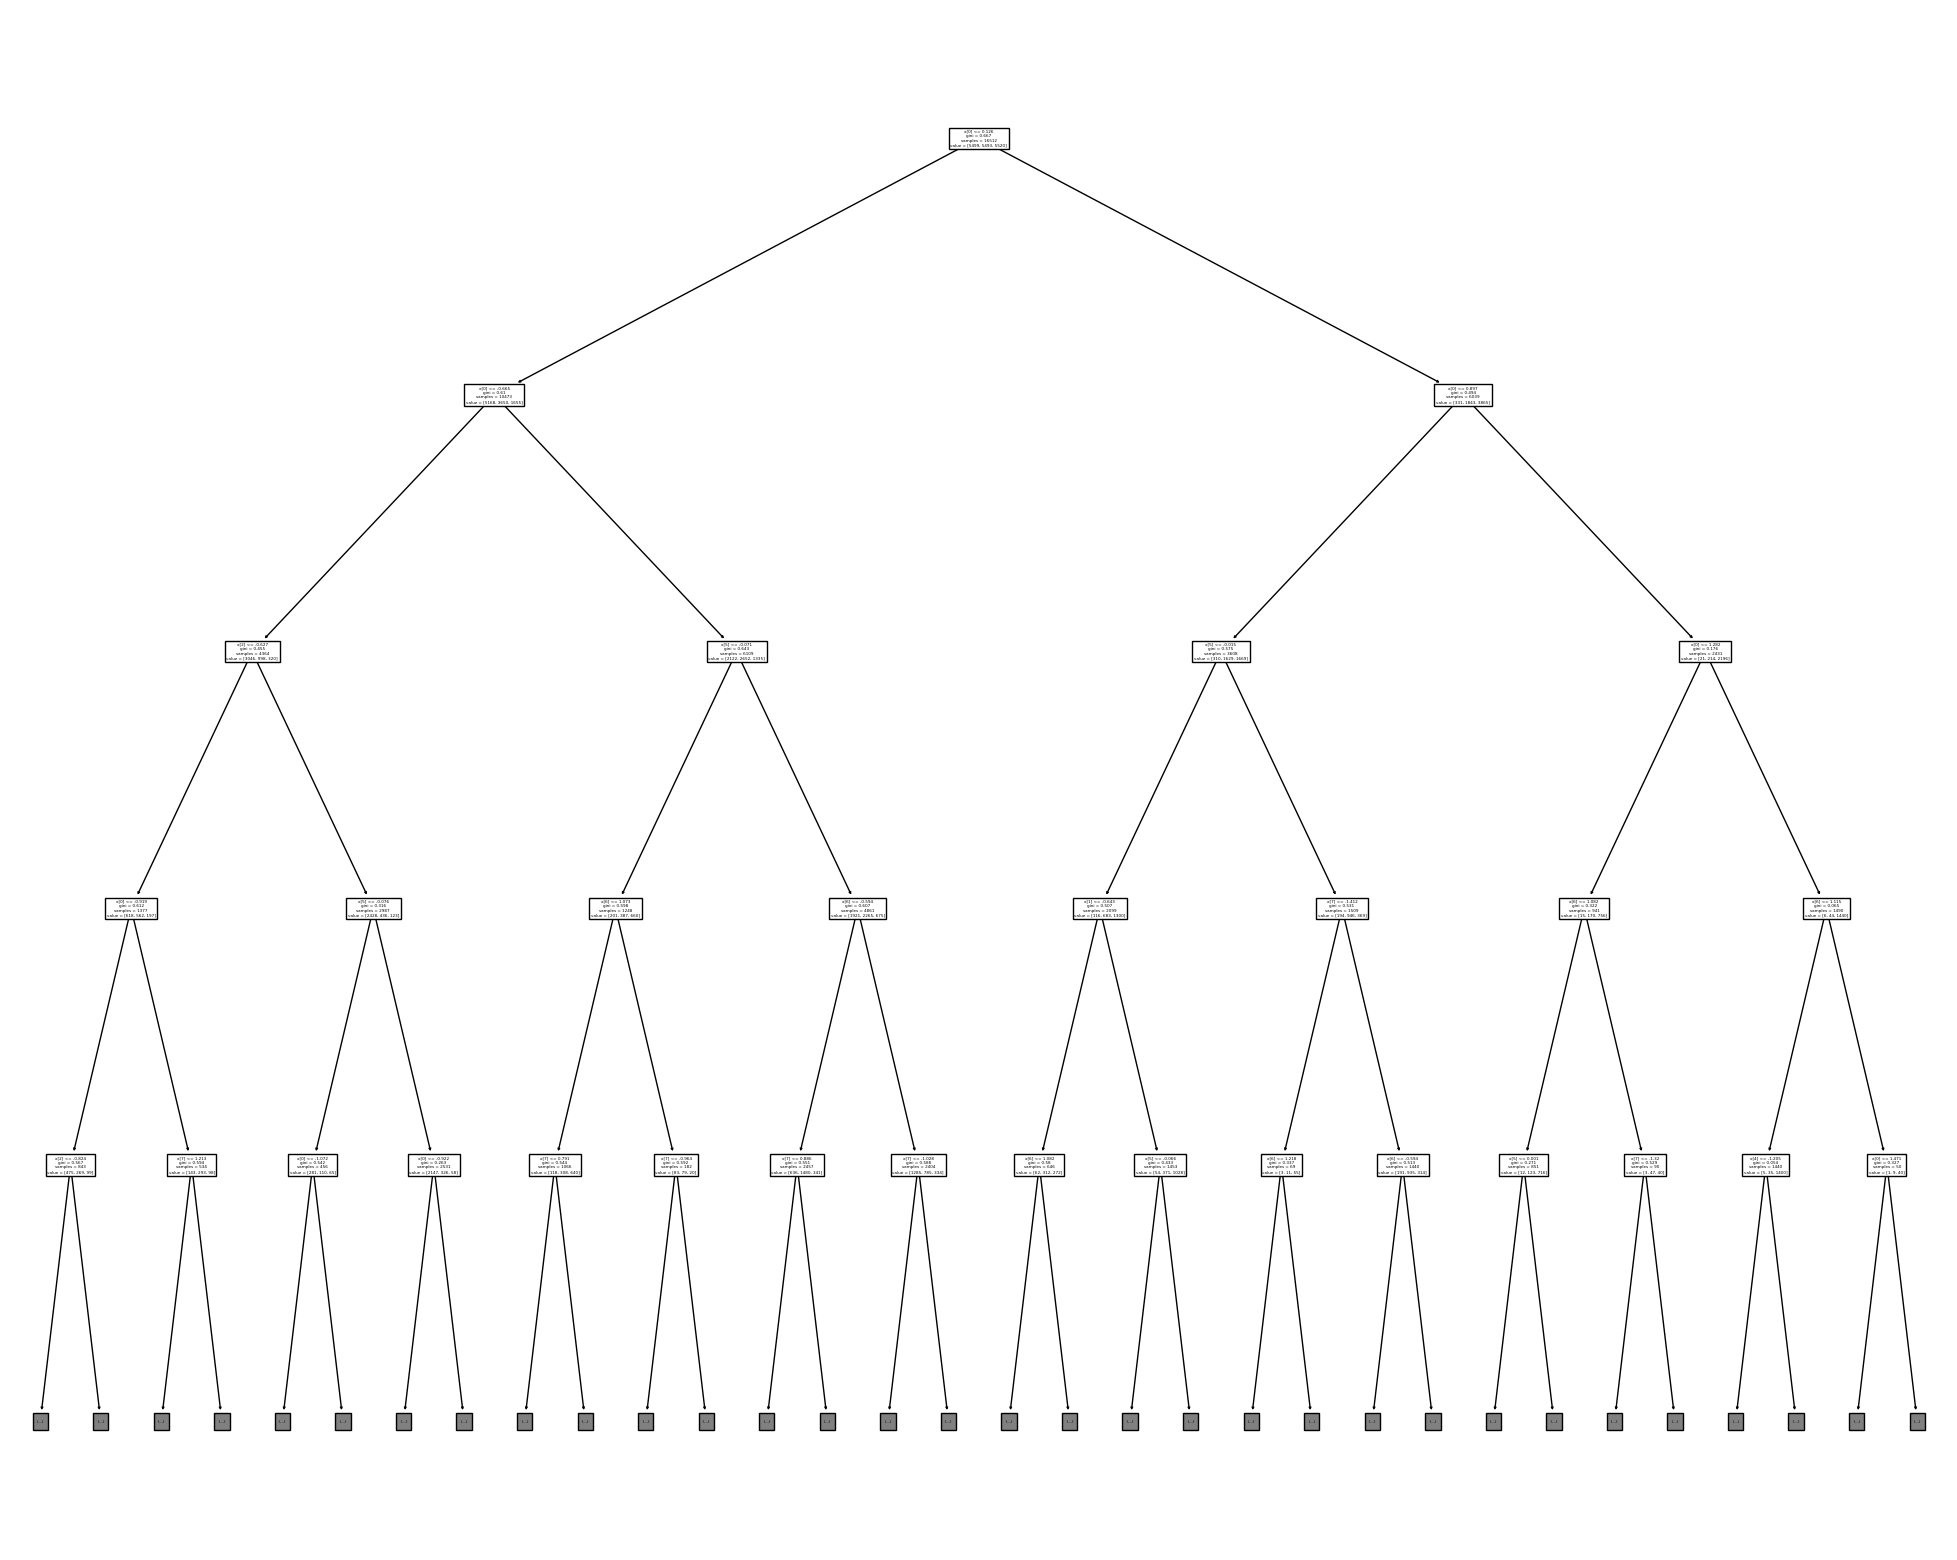

In [85]:
plt.figure(figsize=(25,20))
_ = plot_tree(tree_clf, max_depth = 4)

### 7.1 Оптимизируйте глубину дерева (use GridSearchCV или Optuna).

In [86]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 15)
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='f1_micro')

# запустим поиск
search.fit(X_train, y_train)

# выведем наилучшие параметры
print(search.best_params_)

{'max_depth': 10}


- визуалитизируйте решение дерева посе подбора оптимальной глубины

In [87]:
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
p = clf.predict(X_test)
print(f1_score(y_test, p, average='micro'))

0.7599321705426356


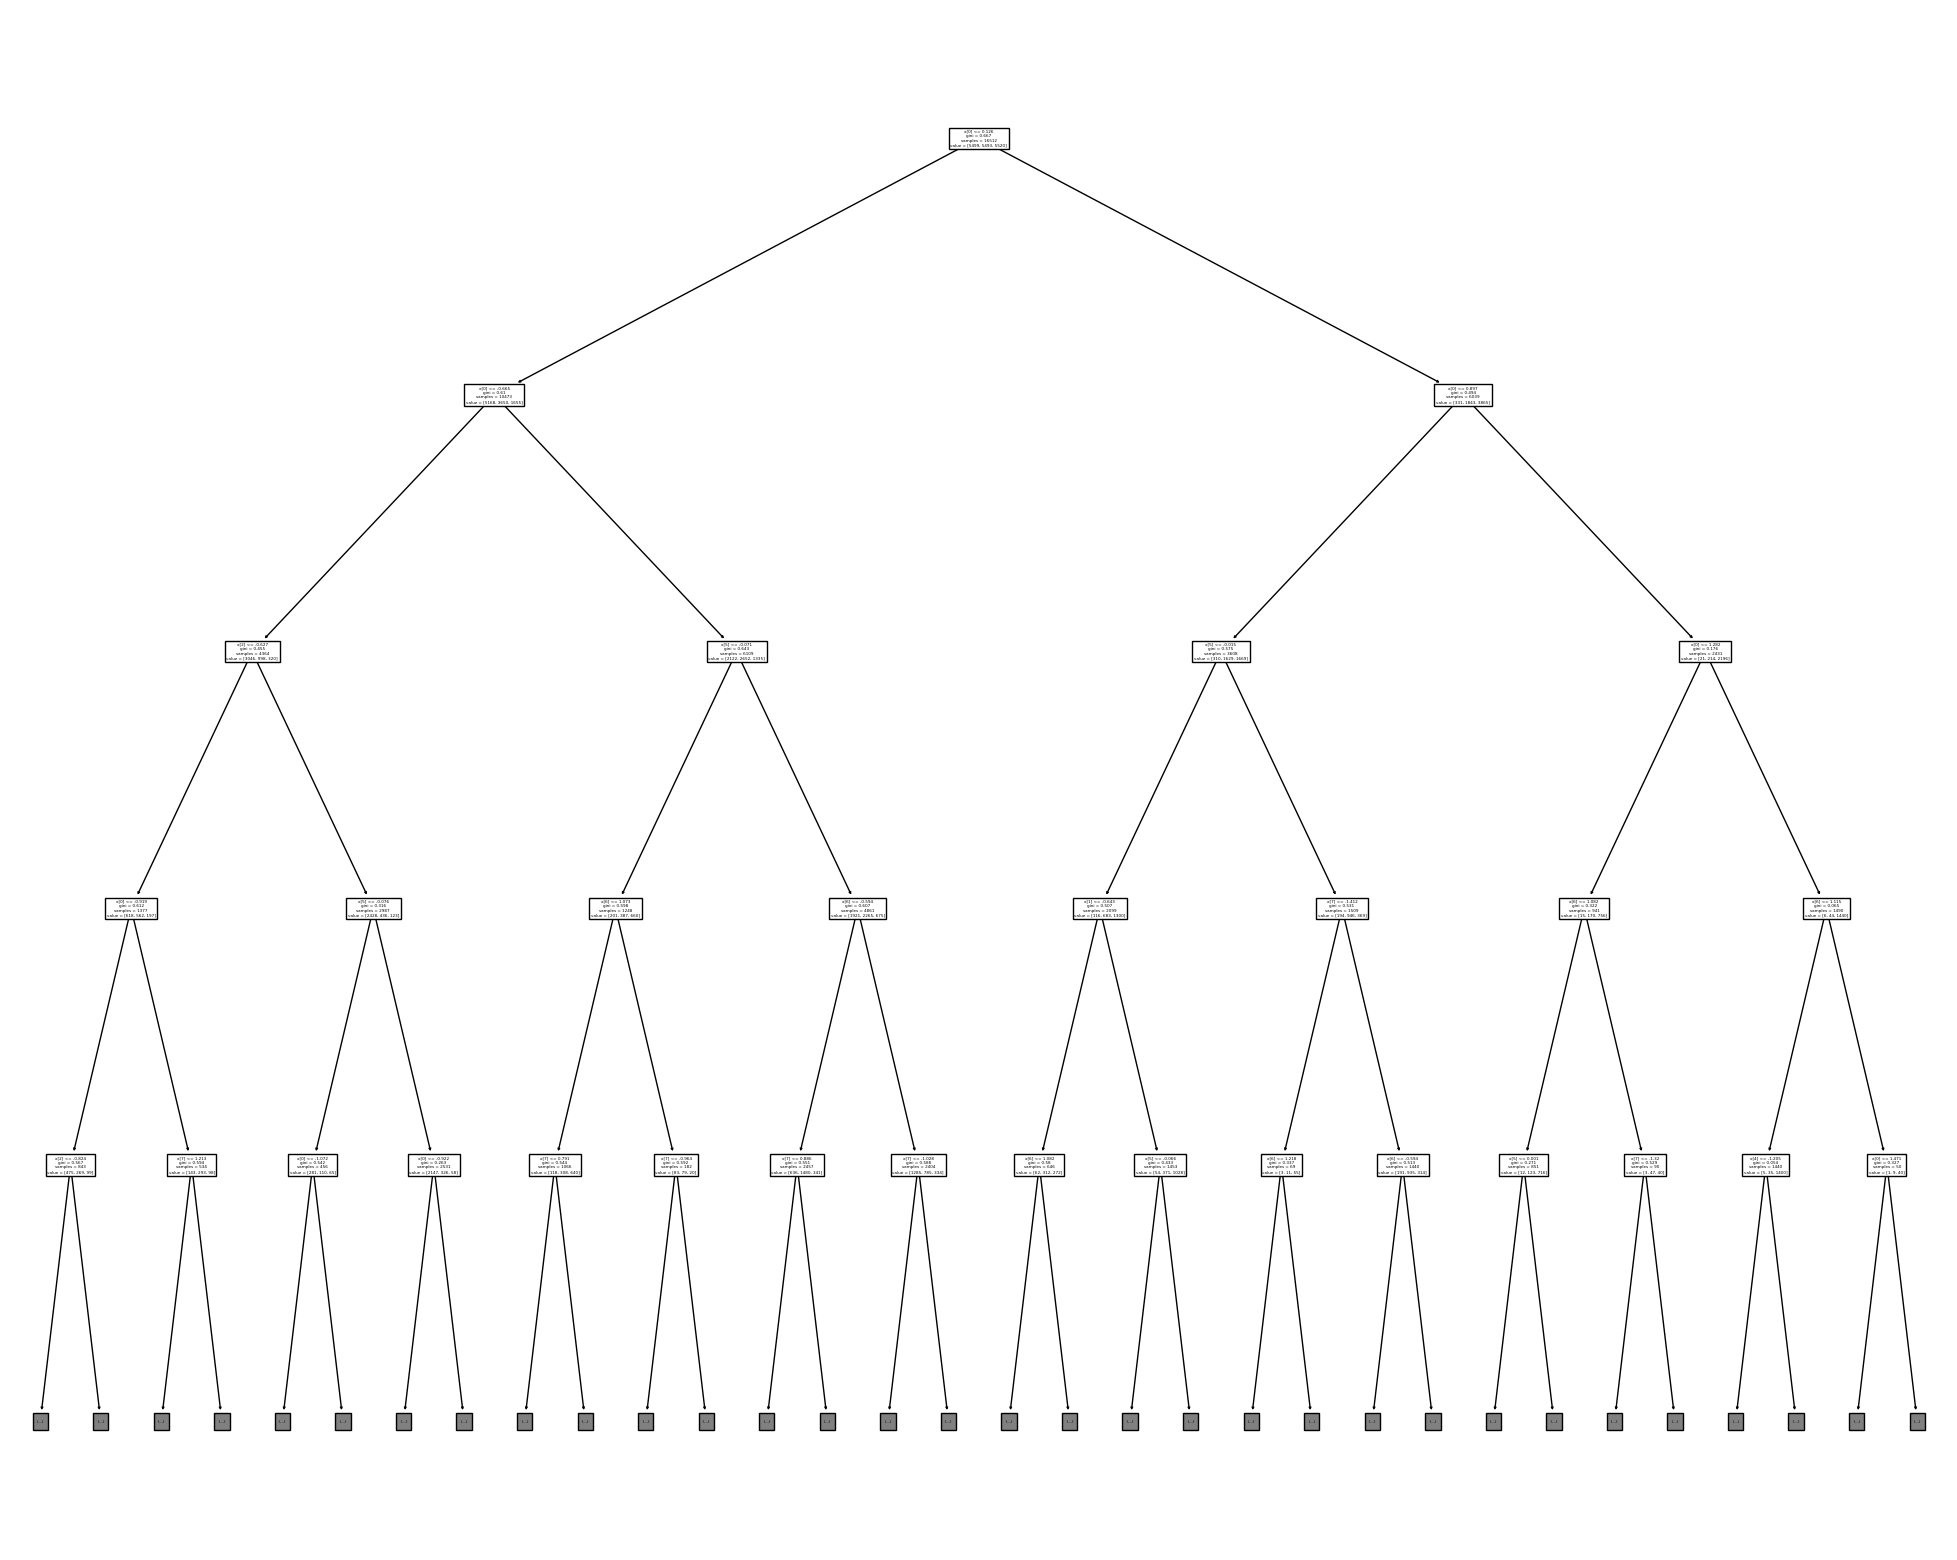

In [88]:
plt.figure(figsize=(25,20))
_ = plot_tree(clf, max_depth = 4)

### 7.2 Оптимизируйте любой другой гиперпараметр модели дерева.

In [89]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 15),
    'criterion': ["gini", "entropy", "log_loss"]
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='f1_micro')

# запустим поиск
search.fit(X_train, y_train)

# выведем наилучшие параметры
print(search.best_params_)

{'criterion': 'gini', 'max_depth': 10}


### 8. Cформулируйте выводы (какая модель лучше и почему, почему оптимальные гиперпараметры эти)

DecisionTreeClassifier сработал лучше чем LinearRegression, так как дерево решений может адаптироваться к выборке любого размера и любому количеству признаков. Ограничние глубины позволило улучшить точность и избежать переобучения

### 9. Decision Tree Regressor

В данном задании мы посмотрим не на результат применения [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) для сгенеренного набора данных.

Генерация данных:

In [90]:
np.random.seed(42)
m = 200
x = np.random.rand(m, 1) * 3 - 1
y = 4 * (x - 0.5) ** 3
y = y + np.random.randn(m, 1) / 10

Функция для визуализации результата (можете модифицировать).


In [91]:
def plot_regression_predictions(tree_reg, x, y, max_depth, x_range = [0, 1],
                                y_range = [-1, 1]):
    """
    Visualize data and model predictions
    :param tree_reg: trained model,
    :param x: features
    :param y: true values
    :param max_depth: max tree depth
    :param x_range: x range
    :param y_range: y range
    """
    x_pred = np.linspace(x_range[0], x_range[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x_pred)
    bias = np.mean(y_pred)
    variance = np.var(y_pred)

    plt.xlim(x_range)
    plt.ylim(y_range)

    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)

    plt.plot(x, y, "b.", label="data")
    plt.plot(x_pred, y_pred, "r.-", linewidth=2, label=f"max_depth = {max_depth}")
    plt.legend()
    return bias, variance

Продемонстрируйте результат [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) при изменении глубины дерева (`random_state=42`). Попробуйте значения глубины $2, 5, 6, 9, 12, 15$
Используйте для визуализации те же данные, на которых происходило обучение.


Примечание: Для построения серии картинок используйте `plt.subplot`.
Пример использования: [ссылка](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py).

bias for DT with depth= 2 is 0.23208717093720996
variance for DT with depth= 2 is 6.933347799794049e-33
bias for DT with depth= 5 is -0.02836006467073072
variance for DT with depth= 5 is 0.040945277805823674
bias for DT with depth= 6 is 0.007798296146059584
variance for DT with depth= 6 is 0.04318297499733044
bias for DT with depth= 9 is 0.0031292707371389384
variance for DT with depth= 9 is 0.046983155424358033
bias for DT with depth= 12 is 0.0051812358083306405
variance for DT with depth= 12 is 0.04691296660809597
bias for DT with depth= 15 is 0.009028948556662548
variance for DT with depth= 15 is 0.0482863474665747


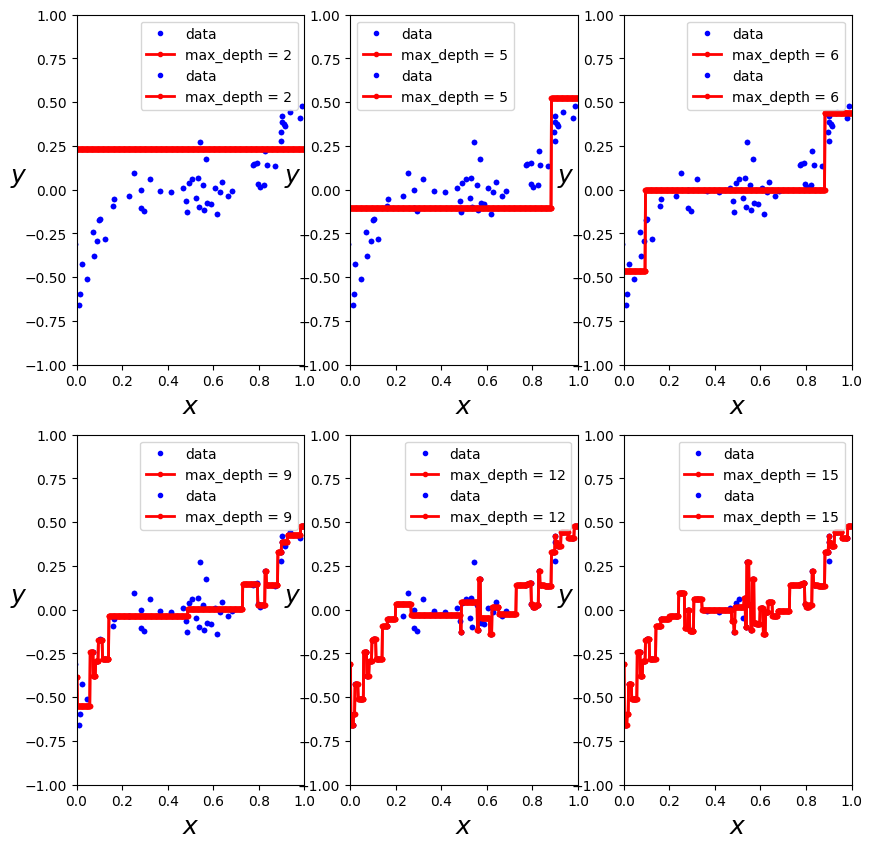

In [92]:
from sklearn.tree import DecisionTreeRegressor

plt.figure(figsize=(10,10))
tree_depths = np.array([2,5,6,9,12,15])
tree_regs =[]
biases, variances = [],[]
for i,depth in enumerate(tree_depths):
    tree_reg = DecisionTreeRegressor(max_depth = depth,random_state=42).fit(x,y) # Your code here
    tree_regs.append(tree_reg)
    plt.subplot(230+i+1)
    biases.append(plot_regression_predictions(tree_reg, x, y, depth, x_range = [0, 1], y_range = [-1, 1])[0])
    variances.append(plot_regression_predictions(tree_reg, x, y, depth, x_range = [0, 1], y_range = [-1, 1])[1])
    print('bias for DT with depth=',depth, 'is', biases[-1])
    print('variance for DT with depth=',depth, 'is', variances[-1])

### 10. Как изменяется при увеличении глубины дерева bias и variance модели?

**Напишите ответ**

Из графиков при разной глубине DT видно, что Variance растет, а Bias уменьшается

## Формат результата

График с демонстрацией bias-variance trade-off для `DecisionTreeRegressor` при изменении глубины дерева.

Text(0.5, 0, 'tree depth')

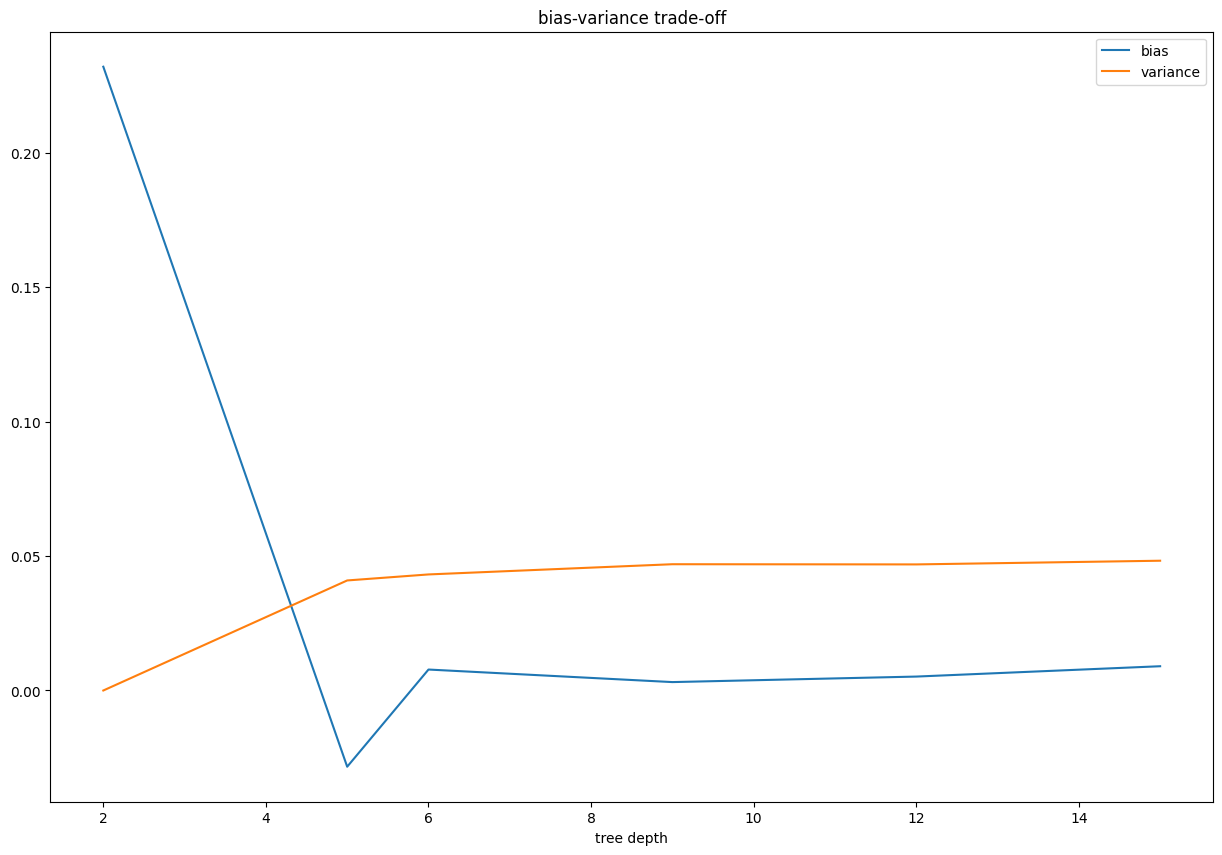

In [93]:
plt.figure(figsize=(15,10))
plt.plot(tree_depths,biases,label="bias")
plt.plot(tree_depths,variances,label="variance")
plt.title("bias-variance trade-off")
plt.legend()
plt.xlabel("tree depth")

Фактически, дерево решений бьет пространство признаков с помощью плоскостей на области, и в каждой из этих областей предсказывается какая-то константная величина.